#   Introduction to Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
tf.__version__


'2.8.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
X = np.array([float(i) for i in range(-7, 15, 3)])
X


array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

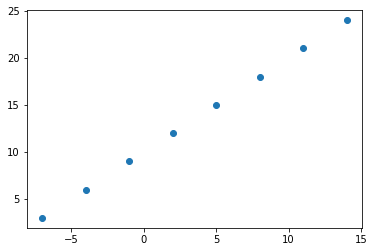

In [21]:
plt.scatter(X, Y)


In [13]:
Y = np.array([float(i+10) for i in range(-7, 15, 3)])
Y


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [15]:
X + 10


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [14]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output Shapes


In [19]:
#
house_info = tf.constant(["bathroom", "bedroom", "garage"])
house_price = tf.constant([90000])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bathroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([90000])>)

In [20]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape


((8,), (8,))

In [23]:
X = tf.constant(X)
Y = tf.constant(Y)
X, Y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [27]:
X[0].shape, Y[0].shape


(TensorShape([]), TensorShape([]))

### Creating a Model

In [53]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
)

model.fit(tf.expand_dims(X,-1), Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 759ms/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 10.9748 - mean_absolute_error: 10.9748


In [54]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improvement 1

In [58]:

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae
              )
with tf.device("/gpu:0"):
    model.fit(tf.expand_dims(X, -1), Y, epochs=100)


ValueError: Unknown attribute 'physical_device' is encountered while parsing the device spec: '/physical_device:GPU:0'.